In our 'explore.py' we've tried a number of models and a number of different training durations for each. In this notebook we'll explore if any of them are any good.

In [24]:
import os
import pickle

x_test = pickle.load(open("models/x_test.pkl","rb"))
y_test = pickle.load(open("models/y_test.pkl","rb"))

models = dict()
for dirname, _, filenames in os.walk("models/"):
        for filename in filenames:

            if not "_" in filename:
                thisFile = os.path.join(dirname, filename)
                thisModel = pickle.load(open(thisFile,"rb"))
                models[filename] = thisModel



In [19]:
from sklearn.metrics import r2_score

solver_name = "lbfgs"

errors = dict()
for iter in range(1,8):
    strName = f"{solver_name} - {iter}.pkl"
    Y_Predict = models[strName].predict(x_test)
    errors[iter] = r2_score(y_test,Y_Predict)

print(errors)

{1: -44.06653551398509, 2: -333.49716467779524, 3: -39.443074805648855, 4: -1.5862798677407959, 5: -0.2566079206389422, 6: -0.06329203911495584, 7: -0.06329203911495584}


That's not good! Negatives means that we have a model so bad that we'd do better with random noise!
Let's look at the alternative scoring method

In [8]:
from sklearn.neural_network import MLPRegressor
solver_name = "lbfgs"

errors = dict()
for iter in range(1,8):
    strName = f"{solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)


{1: -44.06653551398509, 2: -333.49716467779524, 3: -39.443074805648855, 4: -1.5862798677407959, 5: -0.2566079206389422, 6: -0.06329203911495584, 7: -0.06329203911495584}


OK, so the predictions are terrible. Can we visualise the least terrible ones?

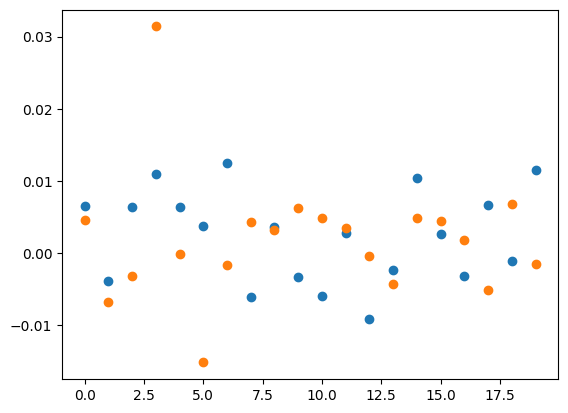

In [28]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

Awful. And that concludes today's work.